# Pedidos Ya en 2022

## Importando bibliotecas

In [114]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Armando el Dataset Anual

In [115]:

filepath = '../Data'
lista_cachonda = os.listdir(filepath)
data = pd.read_csv('../Data/ordersPerDay_20220101-20220131-1671324733.csv')
#print(os.listdir(filepath))
for i in lista_cachonda:
    if i.endswith('.csv') and i.rfind('20220101-20220131') == -1:
        file = filepath + '/' + i
        temp_data = pd.read_csv(file)
        data = pd.concat([data, temp_data])
#Con esto ya tengo los datos de todo el ano juntos

In [116]:
data.shape #(364, 10)

(364, 12)

## Limpieza del Dataset

In [117]:
#Elimino las coolumnas que no aportan nada
data.drop(['Pedidos con pickup', 'Ventas con pickup'], axis=1, inplace=True)

In [118]:
#Chequeo
data.columns

Index(['Fecha', 'Pedidos', 'Rechazados', 'Ventas', 'Pedidos con pago online',
       'Pedidos con pago en efectivo', 'Pedidos con delivery',
       'Ventas con pago online', 'Ventas en efectivo', 'Ventas con delivery'],
      dtype='object')

### Eliminando Registros Repetidos

In [119]:
#Chequeo los duplicados
data.duplicated()

# Elimino los duplicados
data.drop_duplicates(inplace=True)

In [120]:
#Chequeo de la eliminacion
data.shape #(334, 10)

(334, 10)

In [121]:
# Veo como se cargaron los datos
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 29
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Fecha                         334 non-null    object
 1   Pedidos                       334 non-null    int64 
 2   Rechazados                    334 non-null    int64 
 3   Ventas                        334 non-null    object
 4   Pedidos con pago online       334 non-null    int64 
 5   Pedidos con pago en efectivo  334 non-null    int64 
 6   Pedidos con delivery          334 non-null    int64 
 7   Ventas con pago online        334 non-null    object
 8   Ventas en efectivo            334 non-null    object
 9   Ventas con delivery           334 non-null    object
dtypes: int64(5), object(5)
memory usage: 28.7+ KB


In [122]:
data.head()

,Fecha,Pedidos,Rechazados,Ventas,Pedidos con pago online,Pedidos con pago en efectivo,Pedidos con delivery,Ventas con pago online,Ventas en efectivo,Ventas con delivery
0,2022-01-01,73,0,"98.727,00",34,39,73,"46.196,00","52.531,00","98.727,00"
1,2022-01-02,122,0,"144.182,00",64,58,122,"80.472,00","63.710,00","144.182,00"
2,2022-01-03,88,0,"90.694,00",57,31,88,"58.192,00","32.502,00","90.694,00"
3,2022-01-04,164,0,"173.000,00",98,66,164,"105.615,00","67.385,00","173.000,00"
4,2022-01-05,110,0,"131.576,00",60,50,110,"76.152,00","55.424,00","131.576,00"


## Separacion de fecha en 3 columnas

In [123]:
#Separacion de la fecha
data['Mes'] = data.Fecha.str.split('-').str[1]
data['Año'] = data.Fecha.str.split('-').str[0]
data['Dia'] = data.Fecha.str.split('-').str[2]

## Cambio de tipo en las Columnas de Ventas

In [124]:
#Cambio de valores de object a float
V_con_p_o = data['Ventas con pago online'].to_list()
lista_v_p_o = []
for i in V_con_p_o:
    lista_v_p_o.append(float(i.replace('.', '')[:-3]))

V = data['Ventas'].to_list()
lista_v = []
for i in V:
    lista_v.append(float(i.replace('.', '')[:-3]))
print(len(lista_v))

v_e = data['Ventas en efectivo'].to_list()
lista_v_e = []
for i in v_e:
    lista_v_e.append(float(i.replace('.', '')[:-3]))

334


## Eliminando las columnas actuales

In [125]:
#Rehaciendo las columnas de ventas
new_data = data.drop(['Ventas con pago online', 'Ventas en efectivo', 'Ventas', 'Ventas con delivery'], axis=1)

In [126]:
new_data.shape #(334, 9)

(334, 9)

In [18]:
lista_v = np.array(lista_v)
print(len(lista_v))

334


## Agregando las nuevas columnas de Ventas

In [127]:
Ventas = pd.DataFrame(lista_v, columns=['Ventas'])
ve_pa_on = pd.DataFrame(lista_v_p_o, columns=['Ventas con pago online'])
ve_ef = pd.DataFrame(lista_v_e, columns=['Ventas en efectivo'])


new_data.reset_index(inplace=True, drop=True)

new_data = pd.concat([new_data, Ventas], axis=1)
new_data = pd.concat([new_data, ve_pa_on], axis=1)
new_data = pd.concat([new_data, ve_ef], axis=1)


In [128]:
new_data.head()

,Fecha,Pedidos,Rechazados,Pedidos con pago online,Pedidos con pago en efectivo,Pedidos con delivery,Mes,Año,Dia,Ventas,Ventas con pago online,Ventas en efectivo
0,2022-01-01,73,0,34,39,73,01,2022,01,98727.0,46196.0,52531.0
1,2022-01-02,122,0,64,58,122,01,2022,02,144182.0,80472.0,63710.0
2,2022-01-03,88,0,57,31,88,01,2022,03,90694.0,58192.0,32502.0
3,2022-01-04,164,0,98,66,164,01,2022,04,173000.0,105615.0,67385.0
4,2022-01-05,110,0,60,50,110,01,2022,05,131576.0,76152.0,55424.0


## Ventas

### Ventas totales por Mes

In [129]:
new_data.groupby('Mes')['Ventas'].sum()

Mes
01     4143196.0
02     4647215.0
03     4843198.0
04     6187200.0
05     7423721.0
06     8425443.0
07     8823077.0
08    10144750.0
09     9998846.0
10    10451398.0
11    11200037.0
Name: Ventas, dtype: float64

In [130]:
#metricas rapidas
new_data.groupby('Mes')['Ventas'].describe()

,count,mean,std,min,25%,50%,75%,max
Mes,,,,,,,,
01,31.0,133651.483871,39225.823816,58016.0,108463.00,131576.0,161248.50,207128.0
02,28.0,165971.964286,41687.618653,66559.0,146705.25,168056.0,192447.75,234840.0
03,31.0,156232.193548,34882.250545,91548.0,140248.50,156026.0,181052.00,234632.0
04,30.0,206240.000000,43974.614766,125279.0,174031.00,199737.0,244391.00,280335.0
05,31.0,239474.870968,66089.291670,24351.0,197568.50,240879.0,285998.00,356527.0
06,30.0,280848.100000,66588.340769,150388.0,226322.25,273739.0,344272.50,390982.0
07,31.0,284615.387097,83321.713911,101546.0,230601.00,298220.0,346820.00,399334.0
08,31.0,327250.000000,73806.201586,182383.0,275644.50,341504.0,378132.00,454415.0
09,30.0,333294.866667,88984.123413,117005.0,267063.25,340599.5,399625.75,491756.0


### Evolucion de las Ventas totales a lo largo de los Meses del 2022

<AxesSubplot:title={'center':'Ventas totales del 2022'}, xlabel='Mes'>

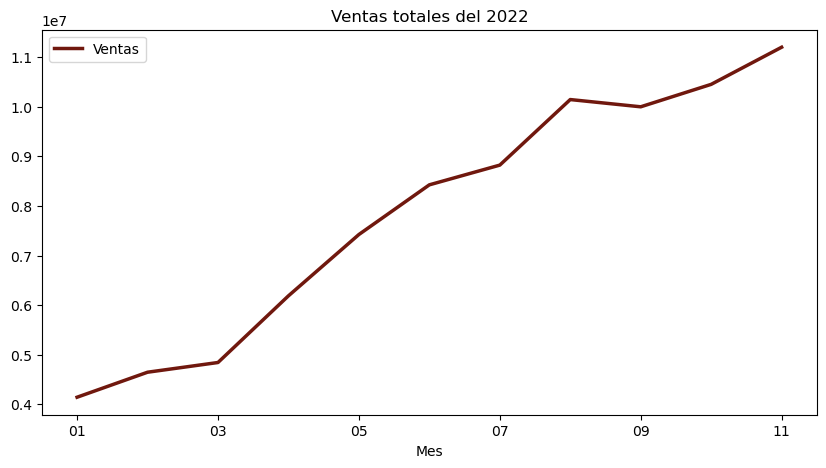

In [131]:
new_data.groupby(by='Mes')['Ventas'].sum().plot(color='#70180E', legend=True, figsize=(10, 5), title='Ventas totales del 2022', linewidth=2.5)

### Evolucion de las Ventas en Efectivo y Pago Online a lo largo de los Meses en 2022

<AxesSubplot:title={'center':'Ventas del 2022 Online vs Efectivo'}, xlabel='Mes'>

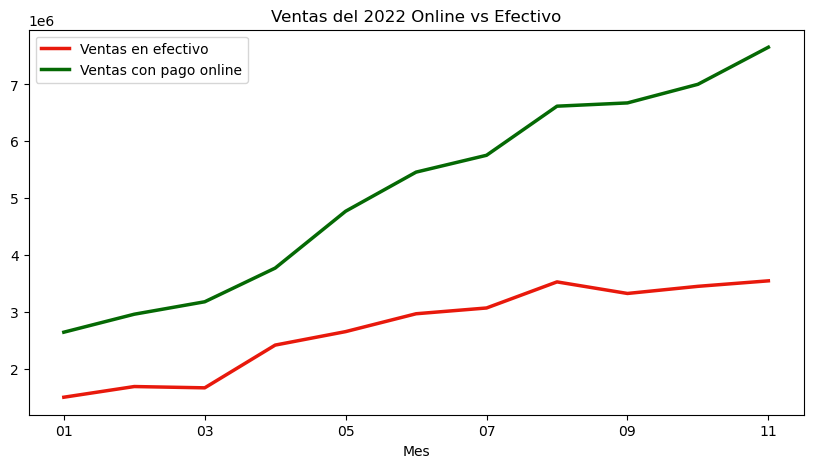

In [132]:
new_data.groupby(by='Mes')[['Ventas en efectivo', 'Ventas con pago online']].sum().plot(legend=True, figsize=(10, 5), title='Ventas del 2022 Online vs Efectivo', color=['#E8190C', '#056904'], linewidth=2.5)

### Distribucion de las 3 Ventas

Text(0.5, 1.0, 'Distribucion de las ventas totales a lo largo de los 11 Meses')

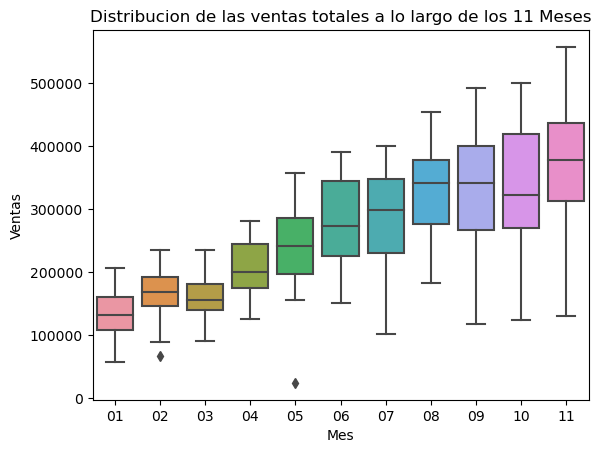

In [133]:
#Distribucion de ventas totales
sns.boxplot(data=new_data, x='Mes', y='Ventas')
plt.title('Distribucion de las ventas totales a lo largo de los 11 Meses')

Text(0.5, 1.0, 'Distribucion de las ventas Online a lo largo de los 11 Meses')

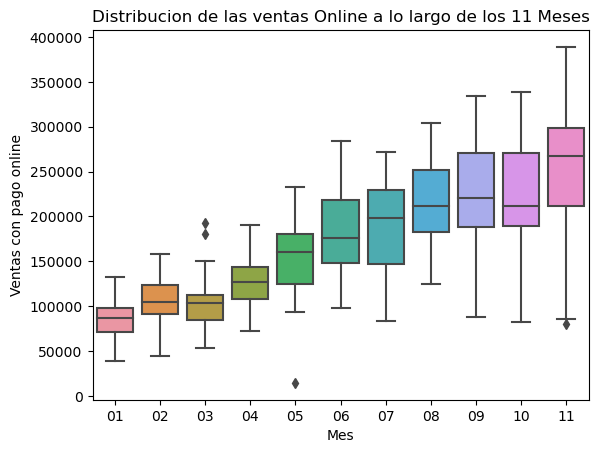

In [136]:
#Ventas Con Pago Online
sns.boxplot(data=new_data, x='Mes', y='Ventas con pago online')
plt.title('Distribucion de las ventas Online a lo largo de los 11 Meses')

Text(0.5, 1.0, 'Distribucion de las ventas en efectivo a lo largo de los 11 Meses')

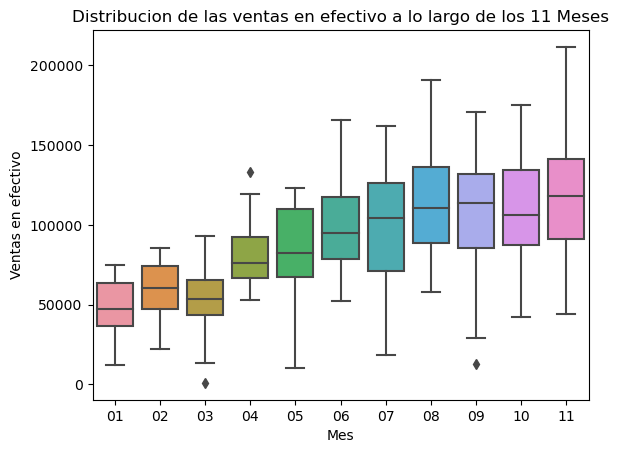

In [137]:
# Ventas en Efectivo
sns.boxplot(data=new_data, x='Mes', y='Ventas en efectivo')
plt.title('Distribucion de las ventas en efectivo a lo largo de los 11 Meses')

In [138]:
#Porcentajes Ventas
n_on = new_data['Ventas con pago online'].to_numpy()
n_to = new_data['Ventas'].to_numpy()
n_efe = new_data['Ventas en efectivo'].to_numpy()

porce_on = (n_on / n_to) * 100
porce_efe = (n_efe / n_to) * 100

Porce_on = pd.DataFrame(porce_on, columns=['Porcentaje Ventas Online'])
Porce_efe = pd.DataFrame(porce_efe, columns=['Porcentaje Ventas en Efectivo'])



new_data.reset_index(inplace=True, drop=True)

new_data = pd.concat([new_data, Porce_on], axis=1)
new_data = pd.concat([new_data, Porce_efe], axis=1)

#print(porce_efe.round(2))

In [139]:
#Chequeo
new_data.head()

,Fecha,Pedidos,Rechazados,Pedidos con pago online,Pedidos con pago en efectivo,Pedidos con delivery,Mes,Año,Dia,Ventas,Ventas con pago online,Ventas en efectivo,Porcentaje Ventas Online,Porcentaje Ventas en Efectivo
0,2022-01-01,73,0,34,39,73,01,2022,01,98727.0,46196.0,52531.0,46.791658,53.208342
1,2022-01-02,122,0,64,58,122,01,2022,02,144182.0,80472.0,63710.0,55.812792,44.187208
2,2022-01-03,88,0,57,31,88,01,2022,03,90694.0,58192.0,32502.0,64.163010,35.836990
3,2022-01-04,164,0,98,66,164,01,2022,04,173000.0,105615.0,67385.0,61.049133,38.950867
4,2022-01-05,110,0,60,50,110,01,2022,05,131576.0,76152.0,55424.0,57.876816,42.123184


### Metricas de los Porcentajes de Ventas Efectivo / Online

In [140]:
new_data.groupby(by='Mes')['Porcentaje Ventas Online', 'Porcentaje Ventas en Efectivo'].describe()

C:\Users\Gian_\AppData\Local\Temp\ipykernel_17788\264939601.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_data.groupby(by='Mes')['Porcentaje Ventas Online', 'Porcentaje Ventas en Efectivo'].describe()


Porcentaje Ventas Online                                             \
                       count       mean       std        min        25%   
Mes                                                                       
01                      31.0  64.181018  7.346697  46.791658  61.209035   
02                      28.0  63.754763  6.000747  51.633418  59.389028   
03                      31.0  65.150891  9.341004  53.583519  60.538804   
04                      30.0  60.893493  5.126646  49.884187  57.735038   
05                      31.0  64.119511  4.437201  54.278954  61.220576   
06                      30.0  64.902219  5.933565  49.850532  62.252664   
07                      31.0  65.956525  7.080908  53.979936  61.276614   
08                      31.0  65.291240  6.428236  53.670378  59.544576   
09                      30.0  66.890823  7.758286  53.874097  61.885668   
10                      31.0  66.973825  4.914810  58.058163  62.676718   
11                      30.0  68.168629  4.446113  58.198807  66.166485   

                                     Porcentaje Ventas en Efectivo             \
           50%        75%        max                         count       mean   
Mes                                                                             
01   63.620568  66.932011  88.706134                          31.0  35.818982   
02   63.751683  67.589052  76.537705                          28.0  36.245237   
03   63.356438  66.796295  99.502058                          31.0  34.849109   
04   59.868799  66.130668  69.615864                          30.0  39.106507   
05   64.196555  67.545389  72.802458                          31.0  35.880489   
06   65.436642  68.570819  75.153558                          30.0  35.097781   
07   66.747797  68.726993  87.016348                          31.0  34.043475   
08   66.901117  70.477398  76.413173                          31.0  34.708760   
09   66.266978  70.861210  95.218496                          30.0  33.109177   
10   67.168754  70.820207  75.860990                          31.0  33.026175   
11   68.814338  70.108220  77.342657                          30.0  31.831362   

                                                                      
          std        min        25%        50%        75%        max  
Mes                                                                   
01   7.346697  11.293866  33.067989  36.379432  38.790965  53.208342  
02   6.000747  23.462295  32.410948  36.248317  40.610972  48.366582  
03   9.341004   0.497942  33.203705  36.643562  39.461196  46.416481  
04   5.126646  30.384136  33.869332  40.131201  42.264962  50.115813  
05   4.437201  27.197542  32.454611  35.803445  38.779424  45.721046  
06   5.933565  24.846442  31.429181  34.563358  37.747336  50.149468  
07   7.080908  12.983652  31.273007  33.252203  38.723386  46.020064  
08   6.428236  23.586827  29.522602  33.098883  40.455424  46.329622  
09   7.758286   4.781504  29.138790  33.733022  38.114332  46.125903  
10   4.914810  24.139010  29.179793  32.831246  37.323282  41.941837  
11   4.446096  22.657343  29.891780  31.185662  33.833515  41.801193

### Graficos de los Porcentajes de Ventas en Efectivo / Online

Text(0.5, 1.0, 'Porcentaje Ventas Online')

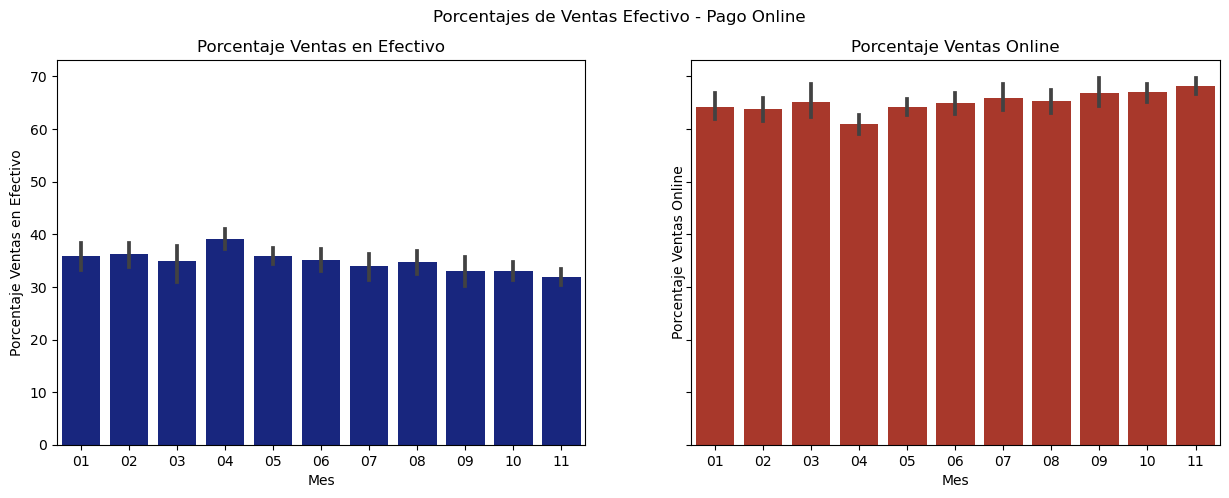

In [141]:
#Intento de ploteo
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Porcentajes de Ventas Efectivo - Pago Online')
#Efectivo
s1 = sns.barplot(x = 'Mes', y = 'Porcentaje Ventas en Efectivo', data=new_data, color = '#07198F', estimator=np.mean, ax=axes[0])
axes[0].set_title('Porcentaje Ventas en Efectivo')
#Pago Online
s1 = sns.barplot(x = 'Mes', y ='Porcentaje Ventas Online', data=new_data, color = '#BD2716', estimator=np.mean, ax=axes[1])
axes[1].set_title('Porcentaje Ventas Online')


## Pedidos

### Distribucion de Cantidad de Pedidos Totales

<AxesSubplot:xlabel='Mes', ylabel='Pedidos'>

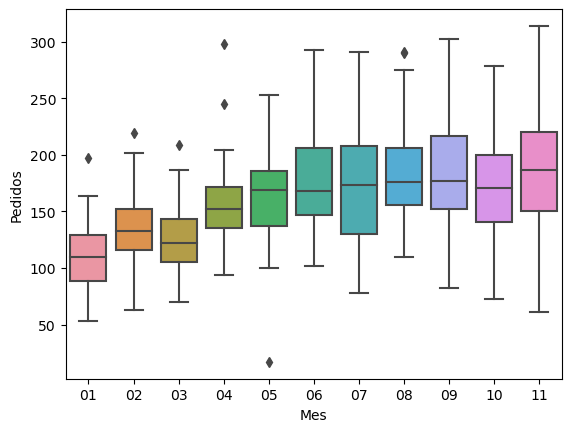

In [94]:
# Distribucion Pedidos totales
sns.boxplot(data=new_data, x='Mes', y='Pedidos')

### Metricas

In [96]:
new_data.groupby('Mes')['Pedidos'].describe()

,count,mean,std,min,25%,50%,75%,max
Mes,,,,,,,,
01,31.0,111.677419,33.114334,53.0,88.50,110.0,129.50,197.0
02,28.0,135.035714,37.412102,63.0,116.25,133.0,152.00,219.0
03,31.0,127.064516,32.290283,70.0,105.00,122.0,143.50,209.0
04,30.0,158.833333,39.827285,94.0,135.00,152.0,171.75,298.0
05,31.0,164.870968,47.031721,17.0,137.50,169.0,186.00,253.0
06,30.0,180.500000,52.559818,102.0,146.50,168.5,206.00,293.0
07,31.0,169.322581,55.668894,78.0,130.50,173.0,208.00,291.0
08,31.0,185.387097,51.009592,110.0,156.00,176.0,206.50,291.0
09,30.0,184.233333,52.897874,82.0,152.25,177.0,217.00,302.0


In [142]:
# Porcentaje de pedidos
pe_on = new_data['Pedidos con pago online'].to_numpy()
pe_to = new_data['Pedidos con delivery'].to_numpy()
pe_efe = new_data['Pedidos con pago en efectivo'].to_numpy()

pe_porce_on = (pe_on / pe_to) * 100
pe_porce_efe = (pe_efe / pe_to) * 100

Pe_Porce_on = pd.DataFrame(pe_porce_on, columns=['Porcentaje Pedidos Online'])
Pe_Porce_efe = pd.DataFrame(pe_porce_efe, columns=['Porcentaje Pedidos en Efectivo'])



new_data.reset_index(inplace=True, drop=True)

new_data = pd.concat([new_data, Pe_Porce_on], axis=1)
new_data = pd.concat([new_data, Pe_Porce_efe], axis=1)

In [163]:
#chequeo
new_data.head()


,Fecha,Pedidos,Rechazados,Pedidos con pago online,Pedidos con pago en efectivo,Pedidos con delivery,Mes,Año,Dia,Ventas,Ventas con pago online,Ventas en efectivo,Porcentaje Ventas Online,Porcentaje Ventas en Efectivo,Porcentaje Pedidos Online,Porcentaje Pedidos en Efectivo
0,2022-01-01,73,0,34,39,73,01,2022,01,98727.0,46196.0,52531.0,46.791658,53.208342,46.575342,53.424658
1,2022-01-02,122,0,64,58,122,01,2022,02,144182.0,80472.0,63710.0,55.812792,44.187208,52.459016,47.540984
2,2022-01-03,88,0,57,31,88,01,2022,03,90694.0,58192.0,32502.0,64.163010,35.836990,64.772727,35.227273
3,2022-01-04,164,0,98,66,164,01,2022,04,173000.0,105615.0,67385.0,61.049133,38.950867,59.756098,40.243902
4,2022-01-05,110,0,60,50,110,01,2022,05,131576.0,76152.0,55424.0,57.876816,42.123184,54.545455,45.454545


### Metricas de los Porcentajes de Pedidos

In [144]:
new_data.groupby(by='Mes')['Porcentaje Pedidos Online', 'Porcentaje Pedidos en Efectivo'].describe()

C:\Users\Gian_\AppData\Local\Temp\ipykernel_17788\2324532753.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  new_data.groupby(by='Mes')['Porcentaje Pedidos Online', 'Porcentaje Pedidos en Efectivo'].describe()


Porcentaje Pedidos Online                                             \
                        count       mean       std        min        25%   
Mes                                                                        
01                       31.0  62.330723  7.101893  46.575342  60.661202   
02                       28.0  62.195591  5.808272  51.260504  58.530341   
03                       31.0  63.826146  9.470390  51.094891  59.621003   
04                       30.0  60.447531  4.488250  51.685393  58.187984   
05                       31.0  63.322308  4.406726  54.545455  60.507897   
06                       30.0  62.474144  5.081337  48.502994  59.781683   
07                       31.0  64.680210  5.869458  54.913295  60.876205   
08                       31.0  64.227616  5.589690  53.846154  60.210339   
09                       30.0  65.822500  6.779849  54.744526  61.474129   
10                       31.0  65.956068  4.697348  58.407080  61.399297   
11                       30.0  67.361557  4.185266  58.333333  65.834252   

                                     Porcentaje Pedidos en Efectivo  \
           50%        75%        max                          count   
Mes                                                                   
01   62.264151  65.075622  86.363636                           31.0   
02   62.294197  64.987790  75.257732                           28.0   
03   61.428571  65.602205  98.260870                           31.0   
04   59.529422  63.902505  68.979592                           30.0   
05   63.247863  65.725635  74.705882                           31.0   
06   62.622549  65.705545  73.796791                           30.0   
07   64.159292  67.873264  82.835821                           31.0   
08   64.166667  68.559429  74.691358                           31.0   
09   66.218686  67.796954  92.948718                           30.0   
10   66.850829  69.794721  74.468085                           31.0   
11   67.470194  70.265152  76.518219                           30.0   

                                                                      \
          mean       std        min        25%        50%        75%   
Mes                                                                    
01   37.669277  7.101893  13.636364  34.924378  37.735849  39.338798   
02   37.804409  5.808272  24.742268  35.012210  37.705803  41.469659   
03   36.173854  9.470390   1.739130  34.397795  38.571429  40.378997   
04   39.552469  4.488250  31.020408  36.097495  40.470578  41.812016   
05   36.677692  4.406726  25.294118  34.274365  36.752137  39.492103   
06   37.525856  5.081337  26.203209  34.294455  37.377451  40.218317   
07   35.319790  5.869458  17.164179  32.126736  35.840708  39.123795   
08   35.772384  5.589690  25.308642  31.440571  35.833333  39.789661   
09   34.177500  6.779849   7.051282  32.203046  33.781314  38.525871   
10   34.043932  4.697348  25.531915  30.205279  33.149171  38.600703   
11   32.638443  4.185266  23.481781  29.734848  32.529806  34.165748   

                
           max  
Mes             
01   53.424658  
02   48.739496  
03   48.905109  
04   48.314607  
05   45.454545  
06   51.497006  
07   45.086705  
08   46.153846  
09   45.255474  
10   41.592920  
11   41.666667

### Graficos de los Porcentajes de Pedidos en Efectivo / Online

Text(0.5, 1.0, 'Porcentaje Pedidos Online')

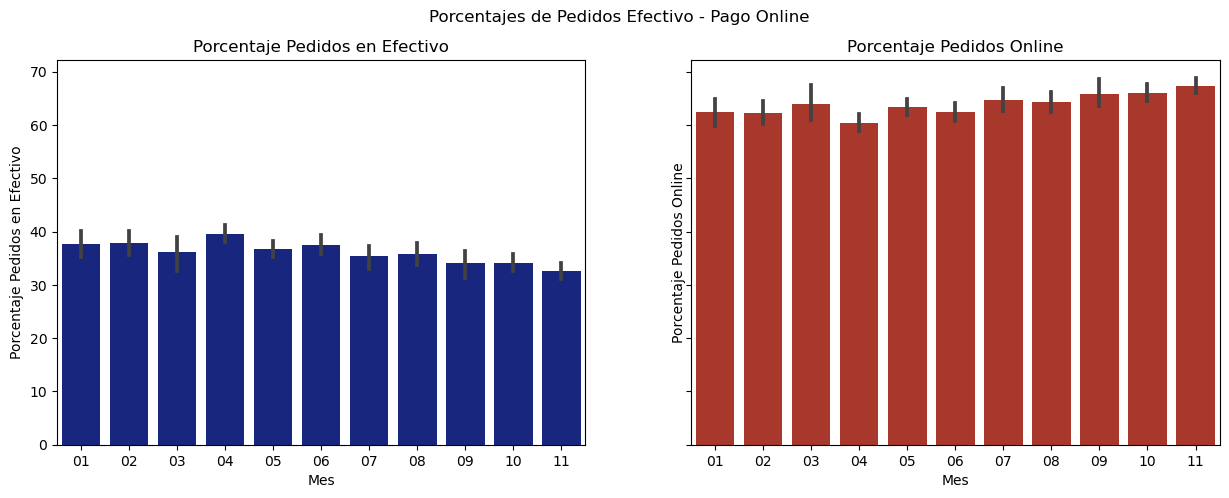

In [145]:
#Grafico de porcentajes de pedidos
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Porcentajes de Pedidos Efectivo - Pago Online')
#Efectivo
s1 = sns.barplot(x = 'Mes', y = 'Porcentaje Pedidos en Efectivo', data=new_data, color = '#07198F', estimator=np.mean, ax=axes[0])
axes[0].set_title('Porcentaje Pedidos en Efectivo')
#Pago Online
s1 = sns.barplot(x = 'Mes', y ='Porcentaje Pedidos Online', data=new_data, color = '#BD2716', estimator=np.mean, ax=axes[1])
axes[1].set_title('Porcentaje Pedidos Online')

## Intento de Regresion Lineal

In [146]:
# verifico la correlacion
new_data.corr()

,Pedidos,Rechazados,Pedidos con pago online,Pedidos con pago en efectivo,Pedidos con delivery,Ventas,Ventas con pago online,Ventas en efectivo,Porcentaje Ventas Online,Porcentaje Ventas en Efectivo,Porcentaje Pedidos Online,Porcentaje Pedidos en Efectivo
Pedidos,1.000000,-0.108782,0.967607,0.882861,1.000000,0.831983,0.812301,0.742687,0.091002,-0.091002,0.102010,-0.102010
Rechazados,-0.108782,1.000000,-0.118827,-0.070797,-0.108782,-0.155197,-0.157438,-0.127147,-0.069383,0.069383,-0.082732,0.082732
Pedidos con pago online,0.967607,-0.118827,1.000000,0.735698,0.967607,0.816782,0.849295,0.629244,0.312482,-0.312482,0.338601,-0.338601
Pedidos con pago en efectivo,0.882861,-0.070797,0.735698,1.000000,0.882861,0.712668,0.599386,0.821964,-0.337141,0.337141,-0.356195,0.356195
Pedidos con delivery,1.000000,-0.108782,0.967607,0.882861,1.000000,0.831983,0.812301,0.742687,0.091002,-0.091002,0.102010,-0.102010
Ventas,0.831983,-0.155197,0.816782,0.712668,0.831983,1.000000,0.973577,0.898001,0.122571,-0.122571,0.135160,-0.135160
Ventas con pago online,0.812301,-0.157438,0.849295,0.599386,0.812301,0.973577,1.000000,0.773798,0.329659,-0.329659,0.323413,-0.323413
Ventas en efectivo,0.742687,-0.127147,0.629244,0.821964,0.742687,0.898001,0.773798,1.000000,-0.295183,0.295183,-0.248230,0.248230
Porcentaje Ventas Online,0.091002,-0.069383,0.312482,-0.337141,0.091002,0.122571,0.329659,-0.295183,1.000000,-1.000000,0.925990,-0.925990
Porcentaje Ventas en Efectivo,-0.091002,0.069383,-0.312482,0.337141,-0.091002,-0.122571,-0.329659,0.295183,-1.000000,1.000000,-0.925990,0.925990


<AxesSubplot:xlabel='Ventas en efectivo', ylabel='Ventas'>

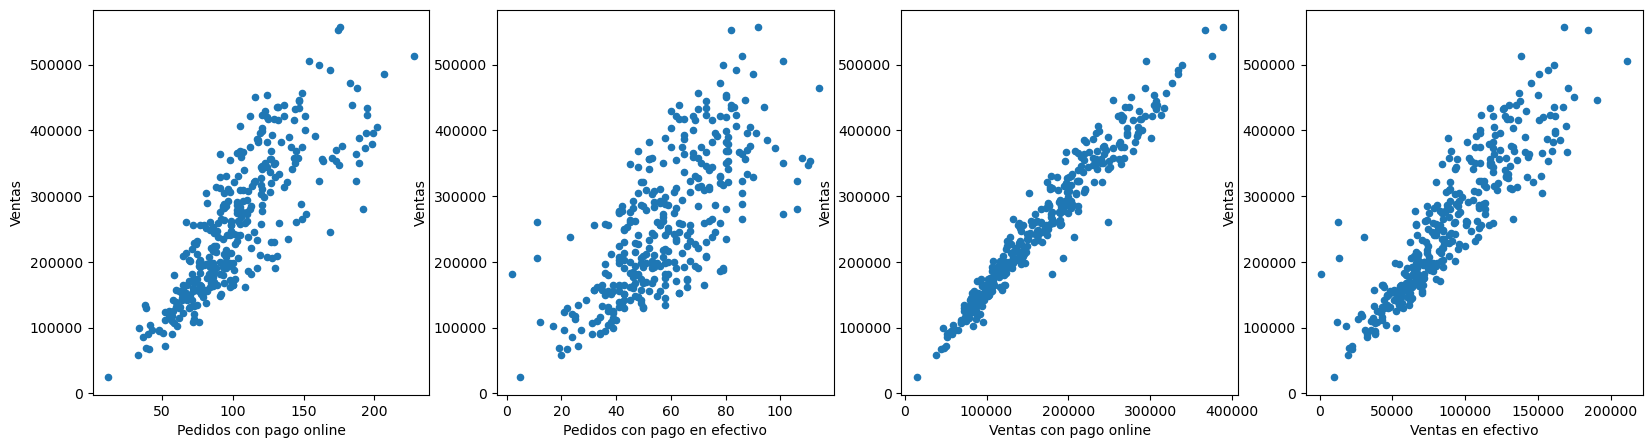

In [151]:
#grafico de la correlacion
fig, axes = plt.subplots(1, 4, figsize=(20,5))
new_data.plot.scatter(x='Pedidos con pago online', y='Ventas', ax=axes[0])
new_data.plot.scatter(x='Pedidos con pago en efectivo', y='Ventas', ax=axes[1])
new_data.plot.scatter(x='Ventas con pago online', y='Ventas', ax=axes[2])
new_data.plot.scatter(x='Ventas en efectivo', y='Ventas', ax=axes[3])

<AxesSubplot:>

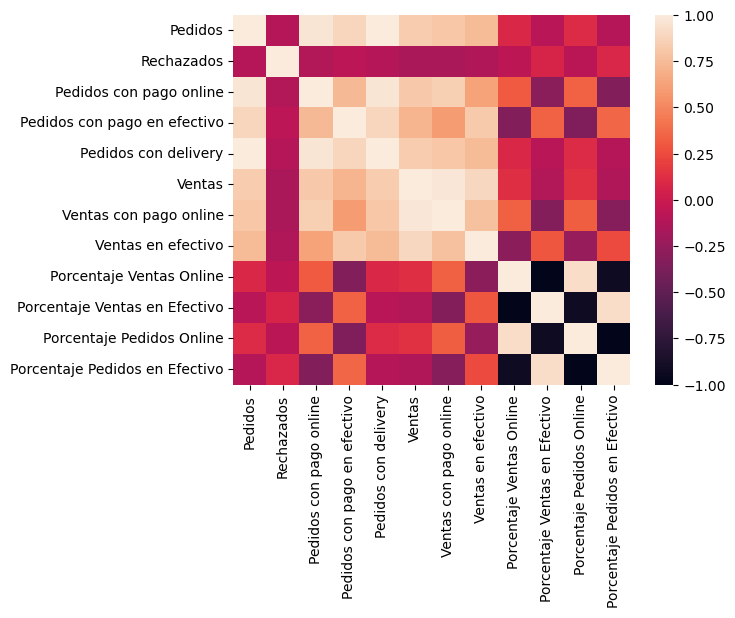

In [150]:
sns.heatmap(new_data.corr())

In [188]:
# SEparando el dataset en train, test
X = new_data[['Pedidos con pago online', 'Pedidos con pago en efectivo', 'Ventas con pago online']]
Y = new_data['Ventas']

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20)
X_test.head()

,Pedidos con pago online,Pedidos con pago en efectivo,Ventas con pago online
179,98,48,173795.0
58,65,39,79636.0
150,133,72,166281.0
48,82,58,103844.0
151,120,64,177091.0


In [190]:
print(f'El dataset de entrenamiento cuenta con : {len(X_train)} observaciones')
print(f'El dataset de evaluacion cuenta con : {len(X_test)} observaciones')

El dataset de entrenamiento cuenta con : 267 observaciones
El dataset de evaluacion cuenta con : 67 observaciones


In [191]:
#Importamos el modelo
from sklearn.linear_model import LinearRegression


In [192]:
#Instanciamos el modelo lineal
modelo_lineal = LinearRegression(fit_intercept=True)

In [193]:
#Estimacion
modelo_lineal.fit(X_train, Y_train)

LinearRegression()

In [194]:
#Coeficientes Etimados
modelo_lineal.coef_

array([-7.83311770e+02,  1.61818060e+03,  1.47671763e+00])

In [195]:
#Intercepto
modelo_lineal.intercept_

-4322.953236733534

In [197]:
coeficientes = modelo_lineal.coef_
intercepto = modelo_lineal.intercept_
b1, b2, b3 = coeficientes[0], coeficientes[1], coeficientes[2]

In [211]:
predict = modelo_lineal.predict(X_test)
predict

array([135775.96335439, 289548.94279462, 289322.82581527, 408596.25445879,
       162780.75215694, 121131.21539486, 204544.95243557, 248543.83176792,
       245731.56109968, 442271.12078674, 138010.25360046, 443874.4547918 ,
       161214.76414984, 182922.15386668, 349877.00091497, 204979.97675188,
       233459.46418527, 193358.96142558, 253231.30299469, 173653.28658525,
       167198.82988654, 172235.16129433, 179680.81386082, 319955.48282928,
       107003.3720297 , 266756.59501616, 398955.86707372, 204046.33993228,
       260833.91760505, 145560.64153429, 234521.04512657, 279731.42200682,
       351464.05182995, 308350.9657336 , 361611.69760707, 359308.60901728,
       366238.20813398, 493131.93743432,  59436.32939461, 357686.83355275,
       176802.97435236, 156658.71786559, 146837.31443037,  87125.02697166,
       510637.78166443, 256274.10786892, 355439.3914933 , 193937.46584994,
       269793.62284581, 298468.59154559,  98134.10138448, 359073.02329898,
       168485.78461093, 2

In [212]:
df = pd.DataFrame({'Actual' : Y_test,
                   'Predicted' : predict})
df

,Actual,Predicted
181,141643.0,135775.963354
166,274210.0,289548.942795
194,298220.0,289322.825815
220,395736.0,408596.254459
43,173930.0,162780.752157
...,...,...
44,66559.0,64445.447225
45,187935.0,209354.091934
14,68232.0,66841.415119
239,313697.0,302491.521743


In [203]:
#Evaluacion del Modelo
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predict))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, predict)))

Mean Absolute Error: 7734.950910257487
Mean Squared Error: 96674354.77586004
Root Mean Squared Error: 9832.31177169744


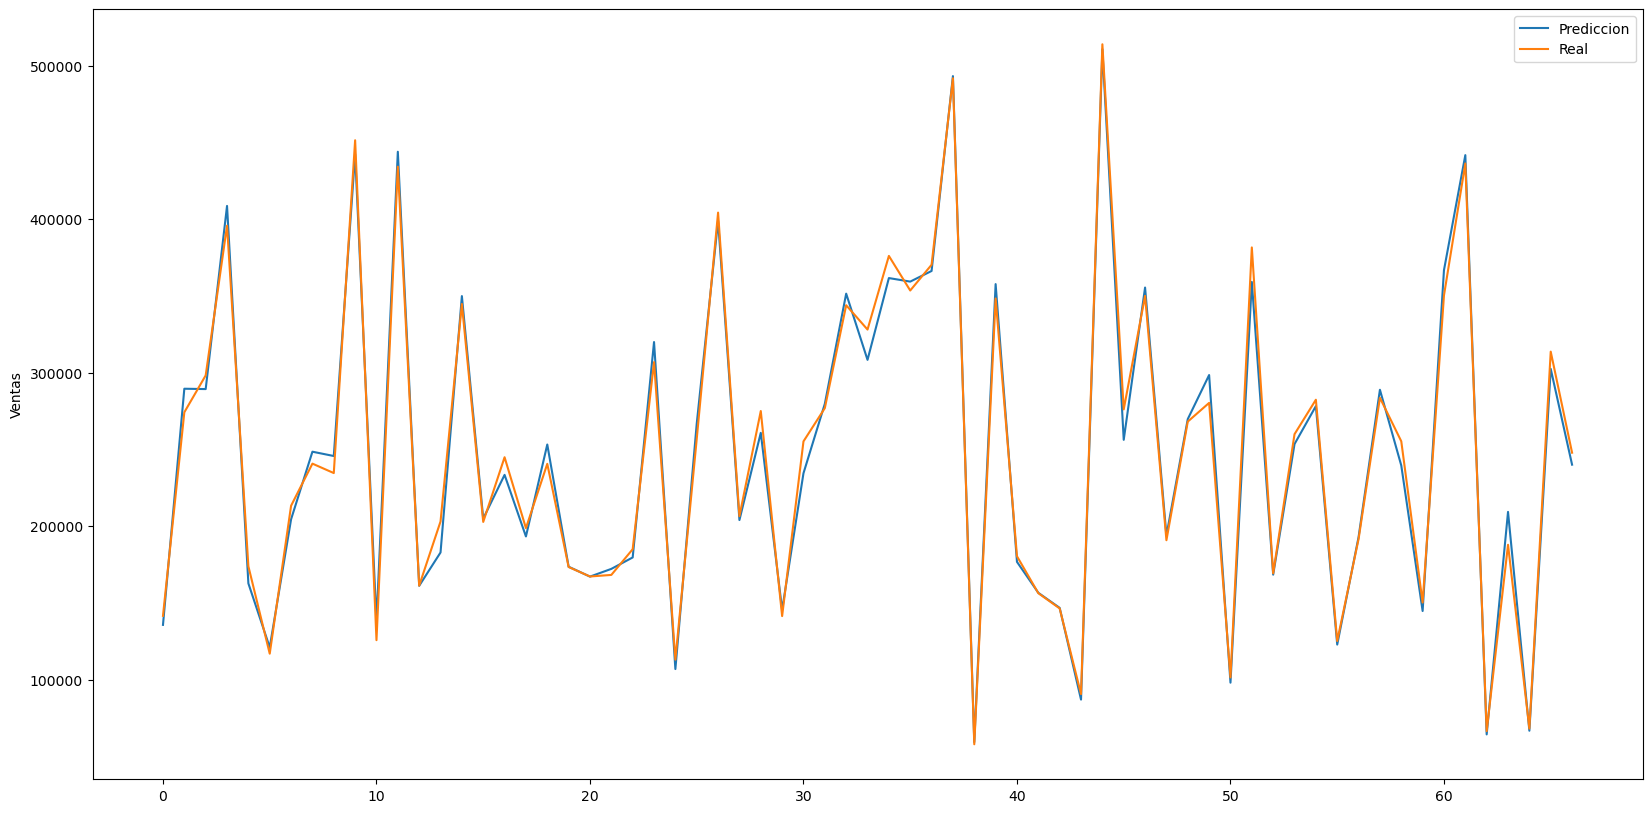

In [202]:
#Ploteamos
plt.figure(figsize = (20,10))

plt.plot(predict, label='Prediccion')
plt.plot(Y_test.values, label='Real')

plt.ylabel('Ventas')

plt.legend()
plt.show()